In [ ]:
import joblib

mi_funcion = joblib.load("docscorer/configupercentagens/interpolation_functions/function_group_a.pkl")



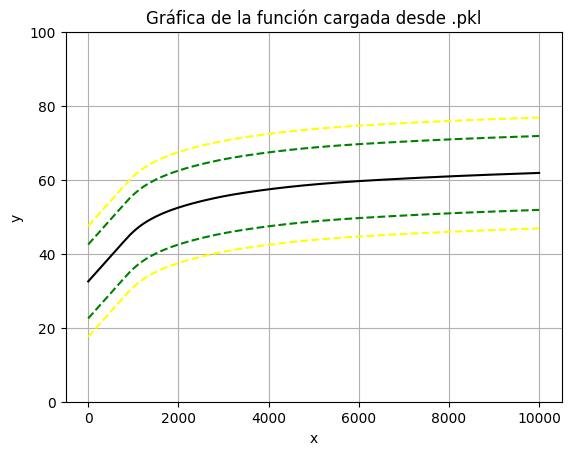

In [26]:
import numpy as np
import matplotlib.pyplot as plt

# Crear un rango de valores para x
x = np.linspace(0, 10000, 400)

# Evaluar la función cargada
y = [mi_funcion(val) for val in x]

# Dibujar la gráfica
plt.plot(x, y, color="black")
plt.xlabel('x')
plt.ylabel('y')
plt.title('Gráfica de la función cargada desde .pkl')
plt.plot(x, [valor - 10 for valor in y], color="green", linestyle="--",label="Y - 10")
plt.plot(x, [valor + 10 for valor in y], color="green", linestyle="--",label="Y - 10")
plt.plot(x, [valor - 15 for valor in y], color="yellow", linestyle="--",label="Y - 10")
plt.plot(x, [valor + 15 for valor in y], color="yellow", linestyle="--",label="Y - 10")
plt.ylim(0, 100)
plt.grid(True)
plt.show()

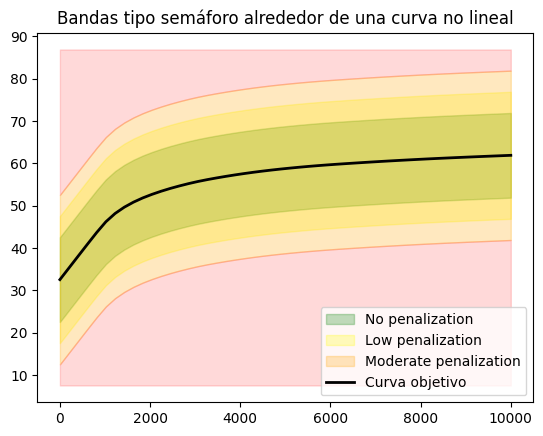

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.collections import LineCollection
from matplotlib.colors import ListedColormap, BoundaryNorm
from matplotlib import cm
from matplotlib.patches import Patch

# --- Cargar la función (ajusta el nombre de archivo si hace falta) ---
mi_funcion = joblib.load("docscorer/configupercentagens/interpolation_functions/function_group_a.pkl")

# --- Crear datos ---
x = np.linspace(0, 10000)
y = np.array([mi_funcion(val) for val in x])

# Definir límites de bandas (distancia vertical)
b1 = 10   # verde
b2 = 15   # amarillo
b3 = 20   # naranja
# > b3 es rojo

# plt.figure(figsize=(10, 5))

# Bandas tipo semáforo
plt.fill_between(x, y - b1, y + b1, color="green", alpha=0.25, label="No penalization")
plt.fill_between(x, y - b2, y + b2, color="yellow", alpha=0.25, label="Low penalization")
plt.fill_between(x, y - b3, y + b3, color="orange", alpha=0.25, label="Moderate penalization")

lower_limit = (y - b3).min() - 5
upper_limit = (y + b3).max() + 5

# Rojos siguiendo la curva
plt.fill_between(x, lower_limit, y - b3, color="red", alpha=0.15)
plt.fill_between(x, y + b3, upper_limit, color="red", alpha=0.15)
red_patch = Patch(color="red", alpha=0.15, label="Penalización extrema")
plt.legend(handles=[red_patch] + plt.gca().get_legend_handles_labels()[0],
           labels=["Penalización extrema"] + plt.gca().get_legend_handles_labels()[1])


plt.plot(x, y, color="black", linewidth=2, label="Curva objetivo")

plt.legend()
plt.title("Bandas tipo semáforo alrededor de una curva no lineal")
plt.show()

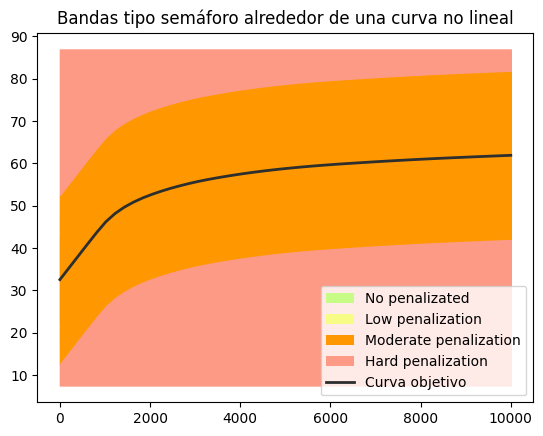

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.patches import Patch
import joblib

# --- Cargar la función ---
mi_funcion = joblib.load("docscorer/configupercentagens/interpolation_functions/function_group_a.pkl")

# --- Crear datos ---
x = np.linspace(0, 10000)
y = np.array([mi_funcion(val) for val in x])

# Definir límites de bandas
b1 = 10   # verde
b2 = 15   # amarillo
b3 = 20   # naranja

# Límites superior e inferior para la banda roja
lower_limit = (y - b3).min() - 5
upper_limit = (y + b3).max() + 5

# --- Dibujar bandas ---
plt.fill_between(x, y - b1, y + b1, color="#c7fc86", alpha=1)
plt.fill_between(x, y - b2, y + b2, color="#f6fc86", alpha=1)
plt.fill_between(x, y - b3, y + b3, color="#FF9800", alpha=1)
plt.fill_between(x, lower_limit, y - b3, color="#fc9a86", alpha=1)
plt.fill_between(x, y + b3, upper_limit, color="#fc9a86", alpha=1)

# Curva objetivo
plt.plot(x, y, color="#2d2e2e", linewidth=2)

# --- Crear la leyenda manualmente ---
legend_elements = [
    Patch(facecolor='#c7fc86', alpha=1, label='No penalizated'),
    Patch(facecolor='#f6fc86', alpha=1, label='Low penalization'),
    Patch(facecolor='#FF9800', alpha=1, label='Moderate penalization'),
    Patch(facecolor='#fc9a86', alpha=1, label='Hard penalization'),
    plt.Line2D([0], [0], color='#2d2e2e', lw=2, label='Curva objetivo')
]

plt.legend(handles=legend_elements)
plt.title("Bandas tipo semáforo alrededor de una curva no lineal")
plt.show()


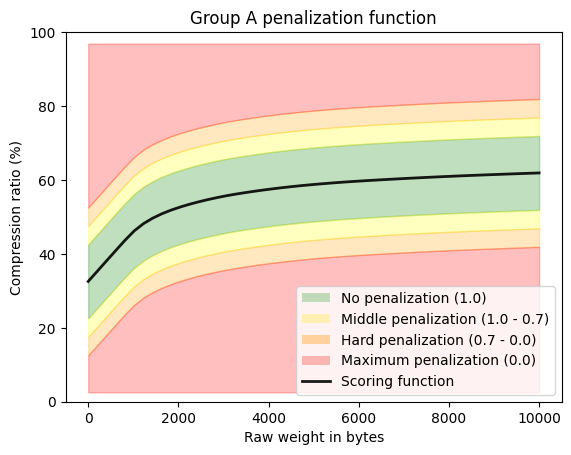

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.patches import Patch
import joblib

# --- Cargar la función ---
mi_funcion = joblib.load("docscorer/configupercentagens/interpolation_functions/function_group_a.pkl")

# --- Crear datos ---
x = np.linspace(0, 10000)
y = np.array([mi_funcion(val) for val in x])

# Definir límites de bandas
b1 = 10   # verde
b2 = 15   # amarillo
b3 = 20   # naranja
# rojo: fuera de b3
lower_limit = (y - b3).min() - 10
upper_limit = (y + b3).max() + 15
plt.ylim(0, 100)

# --- Dibujar bandas sin solapamiento ---
# Verde (banda central)
plt.fill_between(x, y - b1, y + b1, color="green", alpha=0.25)

# Amarillo: solo fuera de verde
plt.fill_between(x, y - b2, y - b1, color="yellow", alpha=0.25)
plt.fill_between(x, y + b1, y + b2, color="yellow", alpha=0.25)

# Naranja: solo fuera de amarillo
plt.fill_between(x, y - b3, y - b2, color="orange", alpha=0.25)
plt.fill_between(x, y + b2, y + b3, color="orange", alpha=0.25)

# Rojo: fuera de naranja
plt.fill_between(x, lower_limit, y - b3, color="red", alpha=0.25)
plt.fill_between(x, y + b3, upper_limit, color="red", alpha=0.25)

# Curva objetivo
plt.plot(x, y, color="#000000", linewidth=2, alpha=0.90)

# --- Leyenda ---
legend_elements = [
    Patch(facecolor='#4CAF50', label='No penalization (1.0)', alpha=0.35),
    Patch(facecolor='#FFEB3B', label='Middle penalization (1.0 - 0.7)', alpha=0.35),
    Patch(facecolor='#FF9800', label='Hard penalization (0.7 - 0.0)', alpha=0.35),
    Patch(facecolor='#F44336', label='Maximum penalization (0.0)', alpha=0.35),
    plt.Line2D([0], [0], color='#000000', lw=2, label='Scoring function', alpha=0.90)
]
plt.ylabel('Compression percentage (%)')
plt.xlabel('Raw weight in bytes')
plt.legend(handles=legend_elements)
plt.title("Group A penalization function")
plt.show()


In [1]:
import pandas as pd

In [ ]:
df = pd.DataFrame(columns=['percentage','number_score'], data=
    [
        [0, 1],
        [1, 1],
        [2, 2],
        [3, 3],
        ]
    )

In [131]:
def scale_value(
    value: float,
    min_value: float,
    max_value: float,
    min_score: float,
    max_score: float,
) -> float:
    """Scale a value linearly into a score range."""
    if min_value == max_value:
        return 0.0

    ratio = (value - min_value) / (max_value - min_value)
    score = ratio * (max_score - min_score) + min_score
    return score

def score(percentage):
    if percentage >= 33.3 or percentage <= 0.4:
            return 0.0
    elif 1.2 <= percentage <= 3.3:
            return 1.0
    elif percentage <= 0.67:
            return scale_value(percentage, 0.4, 0.67, 0.0, 0.5) 
    elif percentage <= 1.2:
            return scale_value(
            percentage, 0.67, 1.2, 0.5, 1.0
        )
    elif percentage >= 3.3:
            return scale_value(
            percentage, 3.3, 33.3, 1.0, 0.0
        )
# def score(percentage):
#     if percentage >=10:
#         return 0.0
#     elif percentage <= 3:
#         return 1.0
#     elif percentage >= 5:
#         return scale_value(percentage, 5, 10, 0.7, 0.0)
#     # elif percentage <= 0.9:
#     #     return scale_value(percentage, 0.5, 0.9, 0.5, 1.0)
#     # elif percentage >= 2.5:
#     #     return scale_value(percentage, 2.5, 25, 1.0, 0.0)
#     return scale_value(percentage, 3, 5, 1.0, 0.7)

In [148]:
import pandas as pd

df = pd.DataFrame(
    columns=['percentage','number_score'],
    data=[
        # [i, score(i)]
        [i, scale_value(i if i <=0.6 else 0.6, 0, 0.6, 0.5, 1.0) if i > 0 else 0.5]
        for i in [i / 10 for i in range(0, 8)]
        # for i in range(0, 30)
    ]
)

df


,percentage,number_score
0,0.0,0.500000
1,0.1,0.583333
2,0.2,0.666667
3,0.3,0.750000
4,0.4,0.833333
5,0.5,0.916667
6,0.6,1.000000
7,0.7,1.000000


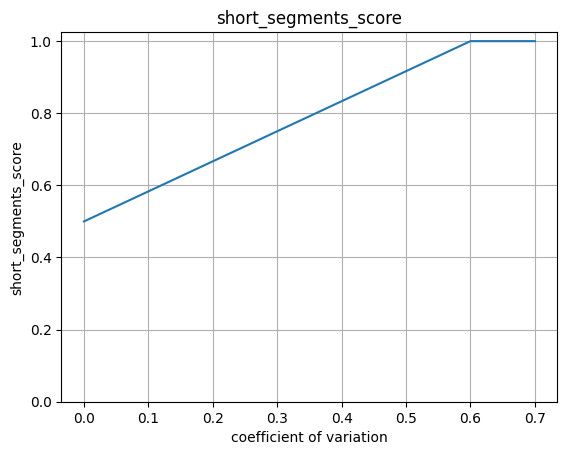

In [154]:
import matplotlib.pyplot as plt

# plt.plot(df2['percentage'], df2['number_score'], color="orange")
plt.plot(df['percentage'], df['number_score'])
plt.xlabel('coefficient of variation')
# plt.xlabel('number of problematic singular_characters')
plt.ylabel('short_segments_score')
plt.title('short_segments_score')
plt.grid(True)
plt.ylim(bottom=0)

# from matplotlib.patches import Patch
# legend_elements = [
#     Patch(facecolor='#1f77b4', label='Spanish', alpha=1),
#     Patch(facecolor='orange', label='Russian', alpha=1),
# ]
# plt.legend(handles=legend_elements)


plt.show()


In [128]:
df

,percentage,number_score
0,0,0.000000
1,1,1.000000
2,2,1.000000
3,3,0.977778
4,4,0.933333
5,5,0.888889
6,6,0.844444
7,7,0.800000
8,8,0.755556
9,9,0.711111


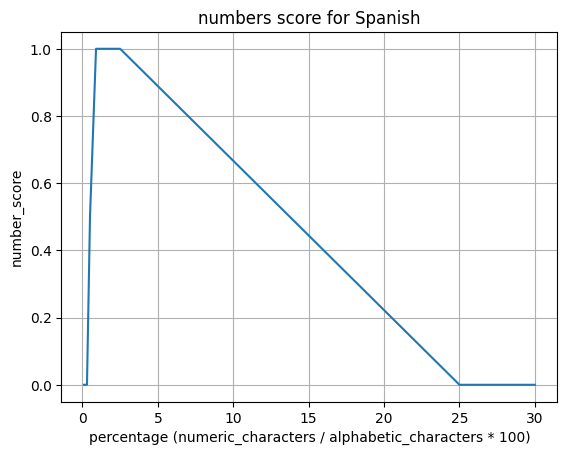

In [81]:
import matplotlib.pyplot as plt

plt.plot(df['percentage'], df['number_score'])
plt.xlabel('percentage (numeric_characters / alphabetic_characters * 100)')
plt.ylabel('number_score')
plt.title('numbers score for Spanish')
plt.grid(True)

plt.show()


In [4]:
from docscorer.configuration import ScorerConfiguration
from docscorer.docscorer import DocumentScorer
import json
import pandas as pd
config = ScorerConfiguration()
scorer = DocumentScorer(config)

In [19]:
from docscorer.scorers.lang_scorer import LangScorer
lang_scorer = LangScorer(config)


In [ ]:
import os

ruta = "D:/Prompsit/Datos/HPLTv3_11_2025/hplt-v3-annotated-samples"
ruta_guardado = "D:/Prompsit/Datos/HPLT3_analizados_ratios"

for carpeta in os.listdir(ruta):
    # if not "spa" in carpeta:
    #     continue
    ruta_carpeta = os.path.join(ruta, carpeta)
    if os.path.isdir(ruta_carpeta):
        print(f"Analizando: {carpeta}")
        for archivo in os.listdir(ruta_carpeta):
            if archivo.endswith(".jsonl"):
                ruta_archivo = os.path.join(ruta_carpeta, archivo)
                print(f"  Archivo encontrado: {archivo}")
                archivo = archivo.split(".")[0].lower()
                with open(ruta_guardado+"/"+archivo+".tsv", 'a+', encoding='utf-8') as f:
                    f.write("lang_score\tword_chars\tnumber_chars\tpunctuation_chars\tsingular_chars\n")
                with open(ruta_archivo, 'r', encoding='utf-8') as f:
                    for linea in f:
                        doc = json.loads(linea)
                        doc_text = doc.get("text", "")
                        doc_langs = [x.lower() for x in doc.get("seg_langs")]
                        features = scorer._extract_features(doc_text)
                        lang_score = lang_scorer.score(ref_language=archivo.split(".")[0].lower(), lang_segments=doc_langs, word_chars=features["word_chars"], id=0)
                        word_chars = sum(features["word_chars"])
                        num_chars = sum(features["numbers"])
                        punt_chars = sum(features["punctuation_chars"])
                        sing_chars = sum(features["singular_chars"])
                        datos = f"{round(lang_score, 2)}\t{word_chars}\t{num_chars}\t{punt_chars}\t{sing_chars}\n"
                        with open(ruta_guardado+"/"+archivo+".tsv", 'a', encoding='utf-8') as f:
                            f.write(datos)
                        



In [ ]:
ruta = "D:/Prompsit/Datos/HPLT3_analizados_ratios/"
df = pd.read_csv(ruta, sep="\t")

In [75]:
df[(df.lang_score > 0.95)&(df.word_chars>1000)].shape

(3782, 5)

In [98]:
selec = df[df.lang_score > 0.5]
selec["numbers_ratio"] = selec["number_chars"] / selec["word_chars"] * 100


C:\Users\pablo\AppData\Local\Temp\ipykernel_17492\2495949412.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  selec["numbers_ratio"] = selec["number_chars"] / selec["word_chars"] * 100


In [96]:
selec.sample(10)

,lang_score,word_chars,number_chars,punctuation_chars,singular_chars,numbers_ratio
8797,1.00,1031,8,97,4,0.775946
2676,1.00,238,4,26,0,1.680672
3240,1.00,36,0,0,0,0.000000
9429,0.75,204,0,34,22,0.000000
4868,0.88,532,77,17,69,14.473684
6526,0.97,803,56,72,3,6.973848
7270,0.95,511,13,61,0,2.544031
49,1.00,1967,49,202,29,2.491103
5660,1.00,349,33,41,2,9.455587
3377,0.98,1247,192,145,99,15.396953


In [97]:
print(selec.numbers_ratio.mean())
print(selec.numbers_ratio.median())
print(selec.numbers_ratio.mode())

59.92775389486531
3.6101083032490973
0    0.0
Name: numbers_ratio, dtype: float64


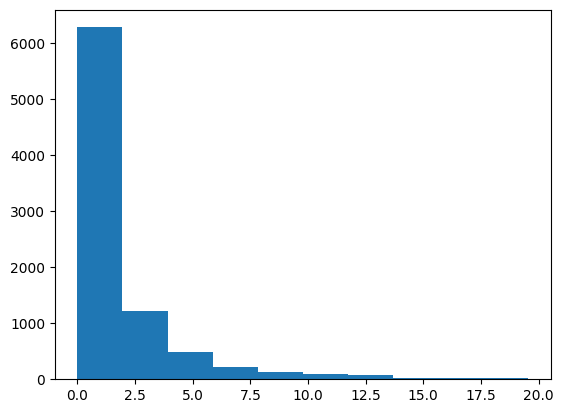

In [66]:
import matplotlib.pyplot as plt
filt = [x for x in selec.numbers_ratio.to_list() if x < 20]
plt.hist(filt, bins=10)
plt.show() 

In [54]:
selec.numbers_ratio.to_list()

[16.901408450704224,
 1.0443864229765014,
 1.043115438108484,
 0.05326704545454545,
 1.3605442176870748,
 0.0585298674470649,
 0.6404391582799633,
 0.7050528789659225,
 0.0,
 2.0408163265306123,
 0.436046511627907,
 1.1038635223281485,
 1.257861635220126,
 0.0,
 0.16741071428571427,
 2.6027397260273974,
 0.8879023307436182,
 0.0,
 0.8416220351951033,
 6.3076923076923075,
 0.12307692307692308,
 2.2284122562674096,
 2.18978102189781,
 0.23084025854108958,
 0.0,
 0.1943634596695821,
 0.40959625511995323,
 0.07137758743754462,
 0.4952538175815105,
 0.0,
 0.03158559696778269,
 5.4822335025380715,
 1.3375571981696586,
 0.16420361247947454,
 0.441696113074205,
 0.5361930294906166,
 2.0408163265306123,
 0.0,
 2.564102564102564,
 0.520494469746259,
 3.6666666666666665,
 0.0,
 0.0,
 6.205784901943225,
 0.6090133982947624,
 1.070472792149866,
 3.508771929824561,
 2.2432113341204247,
 1.3739545997610514,
 7.5,
 0.0,
 0.8308408109006314,
 0.15115764636484294,
 0.0,
 45.52238805970149,
 1.8231540565